# Simple Neural Net using Pytorch

### Import required packages

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#from tqdm.auto import tqdm
from tqdm import tqdm

### Dataset Generation

In [3]:
# Parameters (y = a1*x1 + a2*x2 + a3*x1*x1 + a4*x2*x2 + a5*x1*x2 + b)
a1 = 2.7
a2 = 3.5
a3 = 0.6
a4 = 0.6
a5 = -1.4
b  = 2.0

In [4]:
# Create noisy data
x1_data = np.linspace(-10, 10, num=100000)

x2_data = np.linspace(-10, 10, num=100000)

y_data = a1 * x1_data + \
    a2 * x2_data + \
    a3 * x1_data * x1_data +\
    a4 * x1_data * x1_data +\
    a5 * x1_data * x1_data +\
    b +\
    np.random.normal(size=100000)

In [5]:
x_data = []
for x1,x2 in zip(x1_data,x2_data):
    x_data.append([x1,x2])
x_data = np.array(x_data)

### Build the neuralnet

In [6]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        
        super(NeuralNetwork, self).__init__()
        
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4, 3)
        self.layer3 = nn.Linear(3, 1)
        
    def forward(self, x):
        
        l1 = self.layer1(x)
        l1 = F.relu(l1)
        l2 = self.layer2(l1)
        l2 = F.relu(l2)
        l3 = self.layer3(l2)
        
        output = l3
        
        return output

In [7]:
### Usage of CPU or GPU

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Force Use a Device
# device = 'cuda' #for GPU
# device = 'cpu'  #for CPU

print(f'Using {device} device')

Using cuda device


In [8]:
# Display the model
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=3, bias=True)
  (layer3): Linear(in_features=3, out_features=1, bias=True)
)


In [9]:
# Define Loss and Optimizer

loss_function = nn.MSELoss()

# Stocastic Gradient Descent
#optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

# Adam
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [10]:
# Learn

epochs = 10
batch_size = 32

x_data_tensor = torch.tensor(x_data, device=device).float()
y_data_tensor = torch.tensor(y_data, device=device).float()

for epoch in range(1, epochs+1):
    
    print('epoch: ', epoch)

    batch_start = 0
    batch_end = batch_size
    for i in tqdm(range(int(len(x_data_tensor)/batch_size))):
        # Forward pass: Compute predicted y by passing x to the model

        x_i, y_i = x_data_tensor[batch_start:batch_end], y_data_tensor[batch_start:batch_end]
        batch_start = batch_end
        batch_end = batch_end * 2

        y_pred = model(x_i)

        # Compute and print loss
        loss = loss_function(y_pred.squeeze(), y_i).to(device)

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()

        # perform a backward pass (backpropagation)
        loss.backward()

        # Update the parameters
        optimizer.step()
    
    print('epoch: ', epoch,' loss: ', loss.item())
    print()

epoch:  1


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 412.53it/s]


epoch:  1  loss:  350.5042419433594

epoch:  2


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:06<00:00, 450.16it/s]


epoch:  2  loss:  284.7691650390625

epoch:  3


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 436.88it/s]


epoch:  3  loss:  227.7083740234375

epoch:  4


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 445.38it/s]


epoch:  4  loss:  178.8418426513672

epoch:  5


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 429.64it/s]


epoch:  5  loss:  137.40174865722656

epoch:  6


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 421.85it/s]


epoch:  6  loss:  102.85863494873047

epoch:  7


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 441.68it/s]


epoch:  7  loss:  74.64555358886719

epoch:  8


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 445.60it/s]


epoch:  8  loss:  52.181007385253906

epoch:  9


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:06<00:00, 449.77it/s]


epoch:  9  loss:  34.86271286010742

epoch:  10


100%|█████████████████████████████████████████████████████████████████████████████| 3125/3125 [00:07<00:00, 441.20it/s]

epoch:  10  loss:  22.059009552001953



In [11]:
# Predict (compute) the output 
y_predicted = model(x_data_tensor)

y_predicted = y_predicted.cpu().detach().numpy()

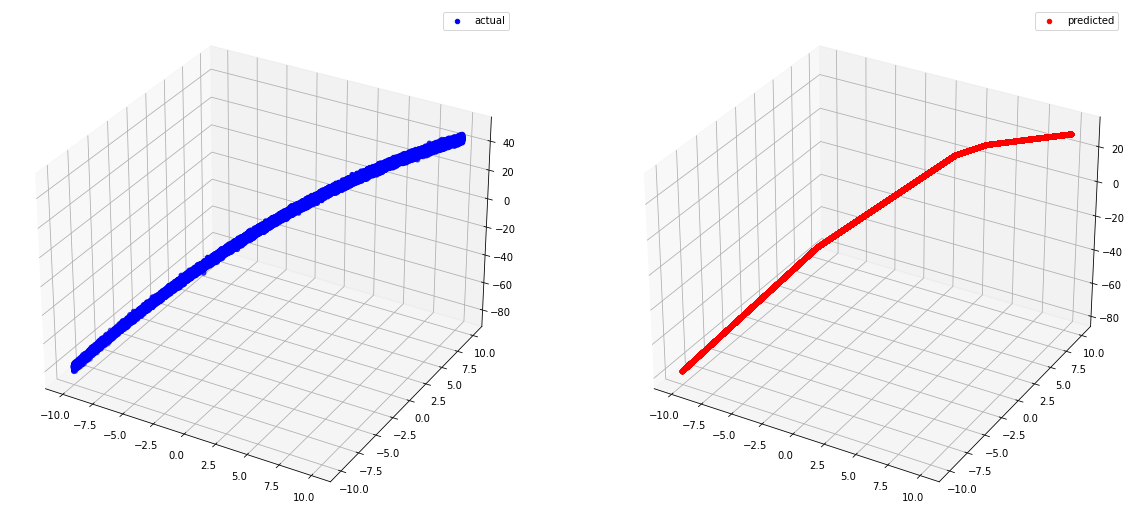

In [12]:
# Plot the data
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(x1_data, x2_data, y_data, label="actual", c='b')
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(x1_data, x2_data, y_predicted, label="predicted", c='r')
plt.legend()

plt.show()